In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#read data
result = np.load("result.npy").item()

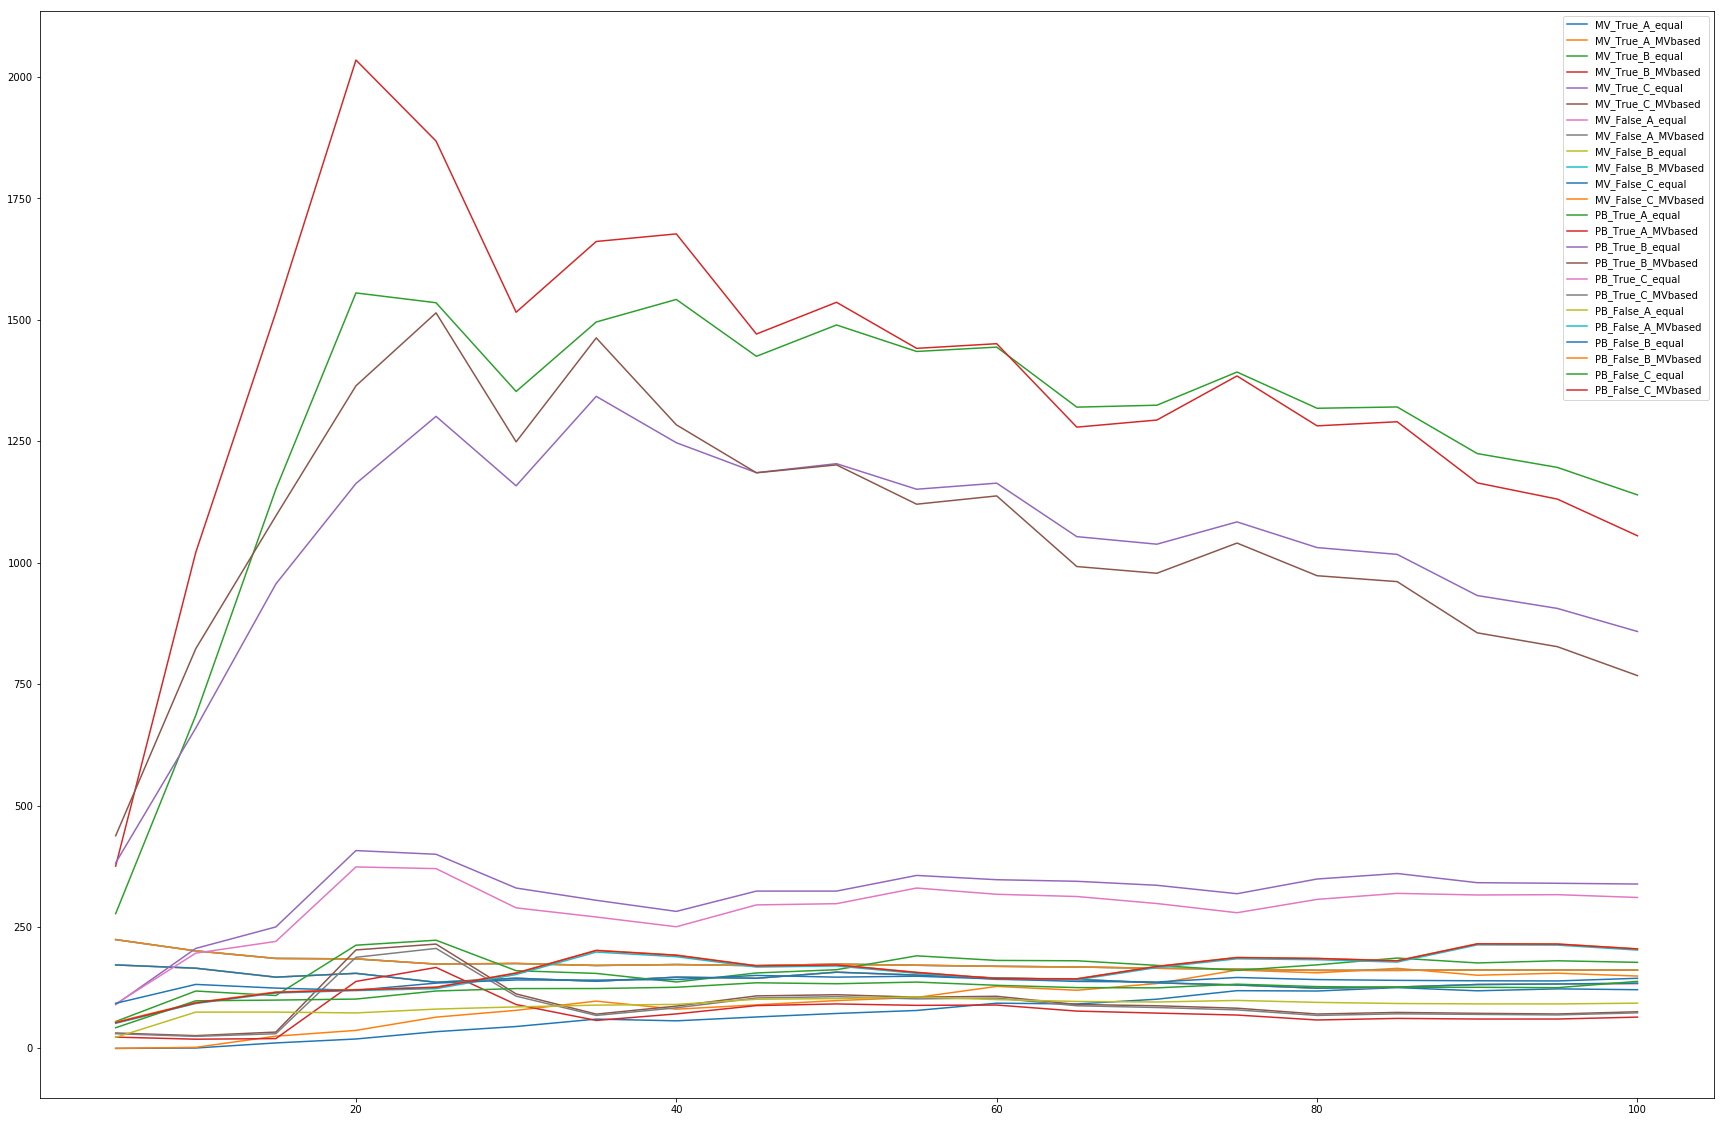

In [16]:
#plot 24 result in all combination of parameters according to different number of stock selected in each year
plt.figure(figsize = (30, 20))

for keys in result.keys():
    temp = pd.DataFrame(result['{}'.format(keys)]).iloc[:, 0]
    temp.index = np.arange(5, 105, 5)
    plt.plot(temp, label = keys)
    
plt.legend();

In [71]:
#define function for plotting
def plot_result(result, conditions, compare_items_num, dotted_line = True):
    #plt.figure(figsize = (16, 8))
    for keys in result.keys():
        conditions_counter = []
        for condition in conditions:
            if condition in keys.split("_"):
                conditions_counter.append(1)
        if sum(conditions_counter) == compare_items_num:
            temp_plot = pd.DataFrame(result['{}'.format(keys)]).iloc[:, 0]
            temp_plot.index = np.arange(5, 105, 5)
            plt.plot(temp_plot, label = keys)
    plt.plot(np.arange(5, 105, 5), [100] * len(np.arange(5, 105, 5)), ls= "--", c = "grey", alpha = 0.8)
    plt.xlabel("Number of stocks selected each year", fontsize = 12)
    plt.ylabel("Remain capital (initial capital = 100 NTD)", fontsize = 12)
    plt.legend();

# In this section, we will discuss how these parameter affect return:
1. **"by"** : select stocks by MV(Market Value) or by PB(Price to Book ratio).
2. **"ascending"** : select stocks according to "by", in ascending(select smallest) or descending(select biggest) way.
3. **"trade_mode"** : 3 trade modes, "A", "B", "C" are provided. During backtesting if certain stock don't meet the requirement of least trade volume, then code itself will set exit price to different value according to appointed trade mode. Exit price will be set = 0, = entry price, = price at exit point(regardless of low liquidity) sequentially in "A", "B", "C" mode.
4. **"weight_mode"** : how the selected stocks form a portfolio, "equally weighted", and "market value based" two ways are provided.

### Given "by = MV", and "trade_mode = C"

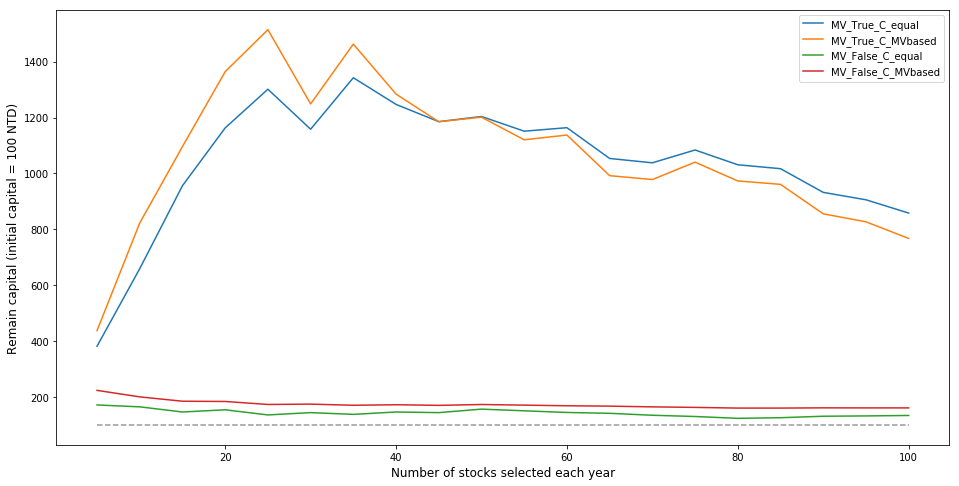

In [82]:
plt.figure(figsize = (16, 8))
plot_result(result, ["MV", "True", "False", "C", "equal", "MVbased"], 4)

### Given "by = MV", and "trade_mode = A" 

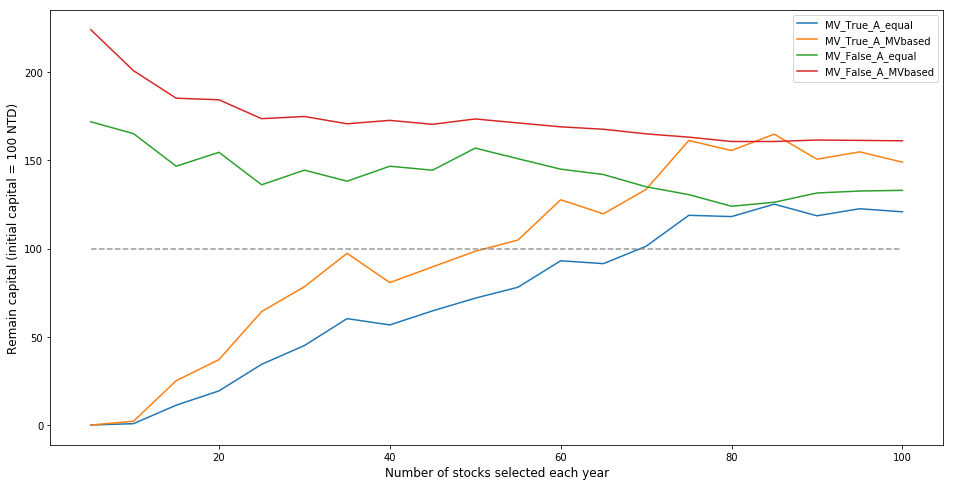

In [80]:
plt.figure(figsize = (16, 8))
plot_result(result, ["MV", "True", "False", "A", "equal", "MVbased"], 4)

1. No matter smallest or biggest market value portfolios, it seems that portfolios perform better if its weight base on market value.
2. As the number of stock selected increase, it seems that there is a convergence in the return. However we can't say that all portfolios' return converge as the number of stocks selected increase, because in this article the highest number of stock selected is 100, we must increase the number to make conclusion. As a result, we can't say biggest market value portfolios' return will decrease as number of stocks selected increase, and smallest market value portfolios' return will increase as the number of stocks selected increase, but from the plot above we might accepted this statement(if number of stock selected falls in the range of 5 to 100).
3. For smallest market value portfolios (in strict condition trade mode = "A"), if number of stock selected increase the return increase as well. We can find that when the number of stock selected is low, then the retrun is pretty bed or even zero, because in trade mode "A" if traded stock don't meet the requirement of least trade volume(on exit day), then the exit price will be set to zero. As a result, if number of stock in portfolio is bigger, it might diversify the risk of letting exit price set to zero, hence increase the return while number of stock selected increase.